<img src = 'Numerical data.png'/>

## 1) Univariate analysis means handling missing value in column by using other values in the same columns.Like replacing with mean value of column

## 2) Multivariate analysis means handling missing values in the column by using other values in other column of the data frame

<h2 style = 'color: red;'>Here in this file we learn <b>Univariate analysis </b>with <br>a) Fillng with mean/median <br>b) Filling with Arbitary value <br>c) Using End of distribution <br>d)Filling values randomly <br> e) Selecting best method directly using skicit learn</h2>

<h2 style = 'color:green;'>Make sure to check covariance,correlation ,variance and outliers using boxplot for data after transformation</h2>

## a) Using mean/median for filling null data

Filling with mean and median in simple but can change `the distribution of data and can introduce outliers in dataset 

In [79]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [157]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived','SibSp','Parch'])

In [159]:
df.head(1)

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.25


In [161]:
df['Family']= df['SibSp'] + df['Parch']

In [163]:
df

,Survived,Age,SibSp,Parch,Fare,Family
0,0,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,1
2,1,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,1
4,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,0
887,1,19.0,0,0,30.0000,0
888,0,NaN,1,2,23.4500,3
889,1,26.0,0,0,30.0000,0


In [165]:
df.drop(['SibSp','Parch'],axis = 1,inplace = True)

In [167]:
df

,Survived,Age,Fare,Family
0,0,22.0,7.2500,1
1,1,38.0,71.2833,1
2,1,26.0,7.9250,0
3,1,35.0,53.1000,1
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,NaN,23.4500,3
889,1,26.0,30.0000,0


In [169]:
df['Family'].unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10], dtype=int64)

In [171]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
Family      0.000000
dtype: float64

In [173]:
# Define the proportion of values to remove
proportion_to_remove = 0.02  # For example, remove 30% of the values

# Calculate the number of values to remove
num_to_remove = int(len(df) * proportion_to_remove)

# Randomly select indices to set to NaN
indices_to_remove = df.sample(n=num_to_remove, random_state=1).index

# Set the values at those indices to NaN
df.loc[indices_to_remove, 'Fare'] = np.nan

In [175]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.019080
Family      0.000000
dtype: float64

In [177]:
Age_mean = df['Age'].mean()
Fare_mean = df['Fare'].mean()

In [179]:
df['Age_mean'] = df['Age'].fillna(Age_mean)
df['Fare_mean'] = df['Fare'].fillna(Fare_mean)

In [181]:
Age_median = df['Age'].median()
Fare_median = df['Fare'].median()

In [183]:
Age_median

28.0

In [185]:
df['Age_median'] = df['Age'].fillna(Age_median)
df['Fare_median'] = df['Fare'].fillna(Fare_median)

In [187]:
df

,Survived,Age,Fare,Family,Age_mean,Fare_mean,Age_median,Fare_median
0,0,22.0,7.2500,1,22.000000,7.250000,22.0,7.2500
1,1,38.0,71.2833,1,38.000000,71.283300,38.0,71.2833
2,1,26.0,NaN,0,26.000000,32.365822,26.0,14.4542
3,1,35.0,NaN,1,35.000000,32.365822,35.0,14.4542
4,0,35.0,8.0500,0,35.000000,8.050000,35.0,8.0500
...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,0,27.000000,13.000000,27.0,13.0000
887,1,19.0,30.0000,0,19.000000,30.000000,19.0,30.0000
888,0,NaN,23.4500,3,29.699118,23.450000,28.0,23.4500
889,1,26.0,30.0000,0,26.000000,30.000000,26.0,30.0000


In [189]:
X= df.drop(['Survived'],axis = 1)
Y = df['Survived']

In [191]:
X_train,X_test,Y_train,Y_test = train_test_split(X,
                                                Y,
                                                test_size=0.2,
                                                random_state=0)

In [193]:
X_train

,Age,Fare,Family,Age_mean,Fare_mean,Age_median,Fare_median
140,NaN,15.2458,2,29.699118,15.2458,28.0,15.2458
439,31.0,10.5000,0,31.000000,10.5000,31.0,10.5000
817,31.0,37.0042,2,31.000000,37.0042,31.0,37.0042
378,20.0,4.0125,0,20.000000,4.0125,20.0,4.0125
491,21.0,7.2500,0,21.000000,7.2500,21.0,7.2500
...,...,...,...,...,...,...,...
835,39.0,83.1583,2,39.000000,83.1583,39.0,83.1583
192,19.0,7.8542,1,19.000000,7.8542,19.0,7.8542
629,NaN,7.7333,0,29.699118,7.7333,28.0,7.7333
559,36.0,17.4000,1,36.000000,17.4000,36.0,17.4000


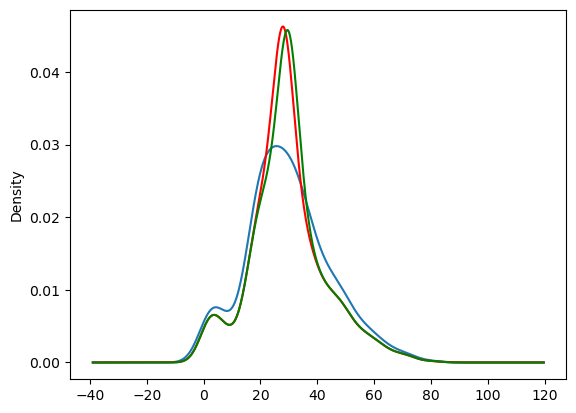

In [195]:
import matplotlib.pyplot as plt

# Create a new figure
fig = plt.figure()#The statement fig = plt.figure(figsize=(15, 5)) sets the overall size of the entire figure,individual subplots are created within this figure
# 15 inches wide and 5 inches tall.

# Add a single subplot (111 means whole grid divided into 1 row, 1 column, 1st subplot)
ax = fig.add_subplot(111)

# Plot KDE for original 'Age' variable
X_train['Age'].plot(kind='kde', ax=ax)

# Plot KDE for 'Age_median' with a different color
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# Plot KDE for 'Age_mean' with another different color
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# Display the plot
plt.show()


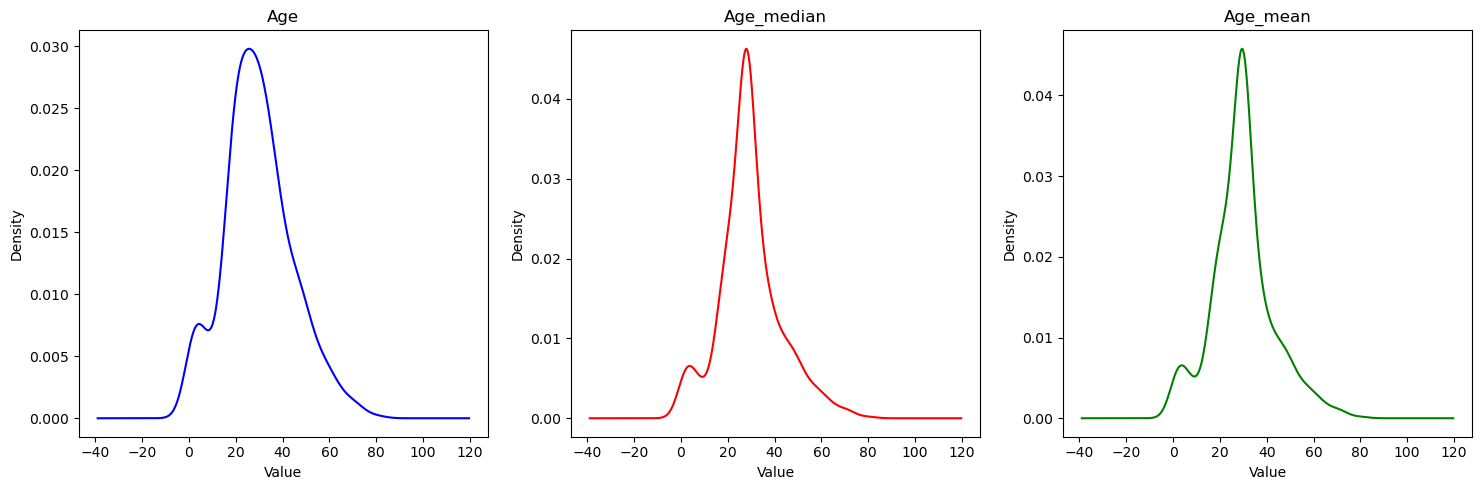

In [205]:
import matplotlib.pyplot as plt

# Create a new figure
fig = plt.figure(figsize=(15, 5)) #The statement fig = plt.figure(figsize=(15, 5)) sets the overall size of the entire figure,individual subplots are created within this figure
# 15 inches wide and 5 inches tall.

# Euta whole grid lai one row ra 3 column ma divide garya where each both is named sequentially as 1st,2nd and 3rd subplot.
ax1 = fig.add_subplot(131)  # 1st subplot
ax2 = fig.add_subplot(132)  # 2nd subplot
ax3 = fig.add_subplot(133)  # 3rd subplot

# Plot KDE for 'Age' in the first subplot
X_train['Age'].plot(kind='kde', ax=ax1, color='blue') #  For drawing histogram just give kind = 'hist'
ax1.set_title('Age')
ax1.set_xlabel('Value')
ax1.set_ylabel('Density')

# Plot KDE for 'Age_median' in the second subplot
X_train['Age_median'].plot(kind='kde', ax=ax2, color='red')
ax2.set_title('Age_median')
ax2.set_xlabel('Value')
ax2.set_ylabel('Density')

# Plot KDE for 'Age_mean' in the third subplot
X_train['Age_mean'].plot(kind='kde', ax=ax3, color='green')
ax3.set_title('Age_mean')
ax3.set_xlabel('Value')
ax3.set_ylabel('Density')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


## In above we can see that when Age_median and Age_mean doesnt preserves the distribution of data as of in Age.Now lets check for Fare

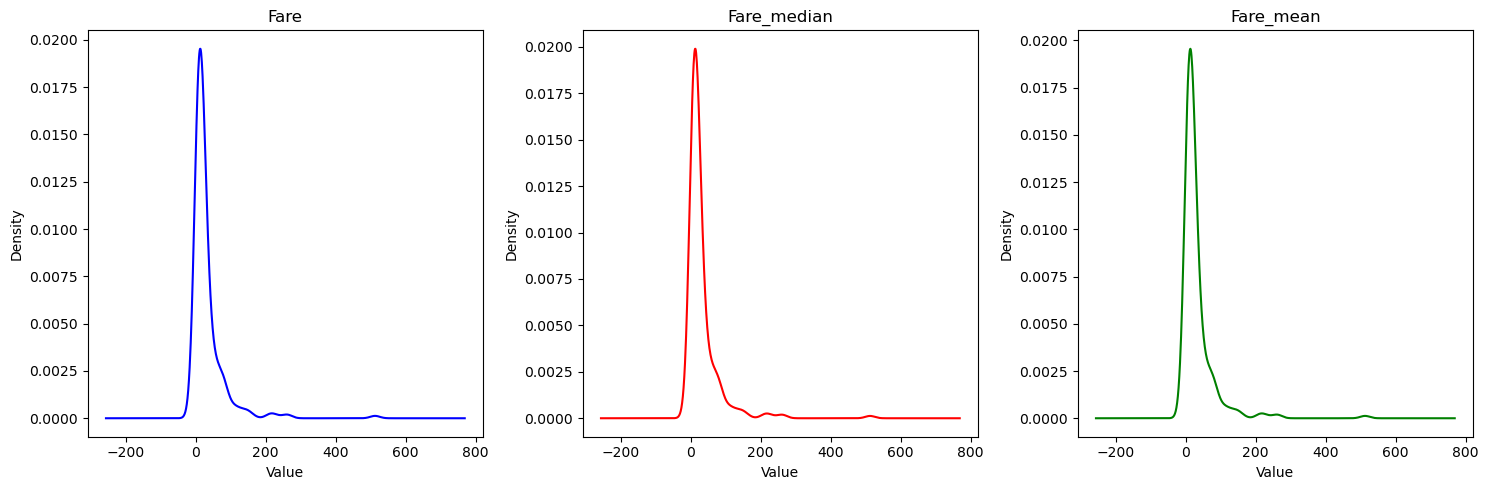

In [201]:
# Create a new figure
fig = plt.figure(figsize=(15, 5))

# Euta whole grid lai one row ra 3 column ma divide garya where each both is named sequentially as 1st,2nd and 3rd subplot.
ax1 = fig.add_subplot(131)  # 1st subplot
ax2 = fig.add_subplot(132)  # 2nd subplot
ax3 = fig.add_subplot(133)  # 3rd subplot

# Plot KDE for 'Age' in the first subplot
X_train['Fare'].plot(kind='kde', ax=ax1, color='blue') #  For drawing histogram just give kind = 'hist'
ax1.set_title('Fare')
ax1.set_xlabel('Value')
ax1.set_ylabel('Density')

# Plot KDE for 'Age_median' in the second subplot
X_train['Fare_median'].plot(kind='kde', ax=ax2, color='red')
ax2.set_title('Fare_median')
ax2.set_xlabel('Value')
ax2.set_ylabel('Density')

# Plot KDE for 'Age_mean' in the third subplot
X_train['Fare_mean'].plot(kind='kde', ax=ax3, color='green')
ax3.set_title('Fare_mean')
ax3.set_xlabel('Value')
ax3.set_ylabel('Density')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


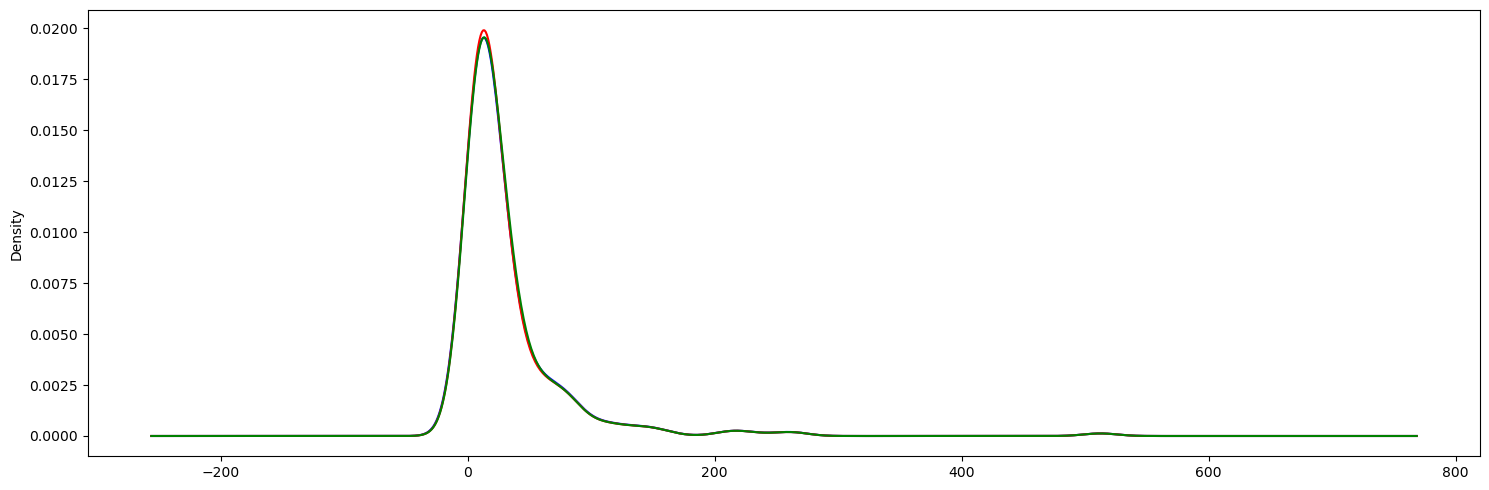

In [203]:
# Create a new figure
fig = plt.figure(figsize=(15, 5))

# Euta whole grid lai one row ra 1 column ma divide garya where each both is named sequentially as 1st,2nd and 3rd subplot.
ax1 = fig.add_subplot(111)  # 1st subplot

# Plot KDE for 'Age' in the first subplot
X_train['Fare'].plot(kind='kde', ax=ax1, color='blue') #  For drawing histogram just give kind = 'hist'

# Plot KDE for 'Age_median' in the second subplot
X_train['Fare_median'].plot(kind='kde', ax=ax1, color='red')

# Plot KDE for 'Age_mean' in the third subplot
X_train['Fare_mean'].plot(kind='kde', ax=ax1, color='green')


# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

## Here we can see no chan;ge in the distribution after and before the mean.

In [210]:
# X_train[['Age','Age_mean','Age_median']].var()
X_train.var()

Age             213.716509
Fare           2556.122948
Family            2.770177
Age_mean        171.334247
Fare_mean      2505.792624
Age_median      171.818292
Fare_median    2511.812463
dtype: float64

## Here we can see Age variance has been reduced highly after applying Mean and Median  which is more than 10% inputer.But Fare variance has just been reduced slightly

In [213]:
X_train.corr()

,Age,Fare,Family,Age_mean,Fare_mean,Age_median,Fare_median
Age,1.000000,0.099736,-0.295318,1.000000,0.099115,1.000000,0.098090
Fare,0.099736,1.000000,0.203377,0.094920,1.000000,0.099160,1.000000
Family,-0.295318,0.203377,1.000000,-0.235258,0.202790,-0.234498,0.205234
Age_mean,1.000000,0.094920,-0.235258,1.000000,0.094434,0.998663,0.093450
Fare_mean,0.099115,1.000000,0.202790,0.094434,1.000000,0.098641,0.998766
Age_median,1.000000,0.099160,-0.234498,0.998663,0.098641,1.000000,0.097797
Fare_median,0.098090,1.000000,0.205234,0.093450,0.998766,0.097797,1.000000


In [215]:
X_train.cov()

,Age,Fare,Family,Age_mean,Fare_mean,Age_median,Fare_median
Age,213.716509,78.398770,-6.393469,213.716509,77.086088,213.716509,76.369832
Fare,78.398770,2556.122948,17.238115,63.110871,2556.122948,66.016947,2556.122948
Family,-6.393469,17.238115,2.770177,-5.125313,16.895552,-5.115968,17.119734
Age_mean,213.716509,63.110871,-5.125313,171.334247,61.876175,171.346696,61.304547
Fare_mean,77.086088,2556.122948,16.895552,61.876175,2505.792624,64.723695,2505.706025
Age_median,213.716509,66.016947,-5.115968,171.346696,64.723695,171.818292,64.247415
Fare_median,76.369832,2556.122948,17.119734,61.304547,2505.706025,64.247415,2511.812463


## In above two cell ,we can see that Fare doesnt have much change in covariance and coreelation while applying mean and median to the null dataset.But Age has drastic one

<Axes: >

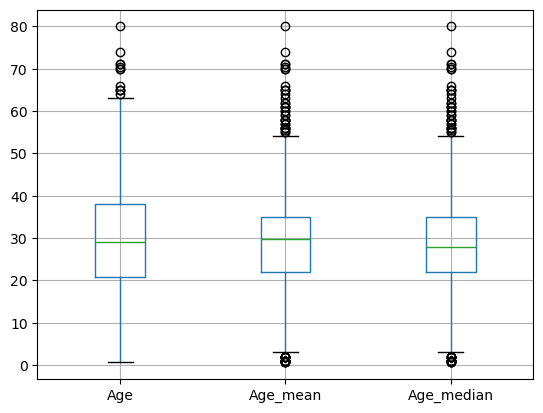

In [218]:
X_train[['Age','Age_mean','Age_median']].boxplot()

## Here in box plot more outliers are being generated in Age_mean and Age_median which is not good

<Axes: >

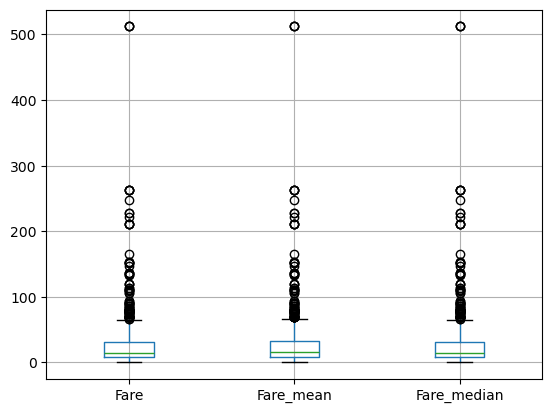

In [221]:
X_train[['Fare','Fare_mean','Fare_median']].boxplot()

## Fare didnot introduce more outlier here

<h1 style = 'color:red;'>Seeing all the condition above,it seems suitable to apply mean median in null value in fare instead of in age</h1>